# Chapter 5 Laboratory

## Foundations for statistical inference - Sampling distributions

In this lab, you will investigate the ways in which the statistics from a random sample of data can serve as point estimates for population parameters. We’re interested in formulating a _sampling distribution_ of our estimate in order to learn about the properties of the estimate, such as its distribution.

__Setting a seed:__ We will take some random samples and build sampling distributions in this lab, which means we should set a seed at the start of the lab.

## Getting Started

### Load packages

In this lab, we will explore and visualize the data using the tidyverse suite of packages. We will also use the infer package for resampling.

Let’s load the packages.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Setting the seed
np.random.seed(0)

## The data

A 2019 Gallup report states the following:

> The premise that scientific progress benefits people has been embodied in discoveries throughout the ages – from the development of vaccinations to the explosion of technology in the past few decades, resulting in billions of supercomputers now resting in the hands and pockets of people worldwide. Still, not everyone around the world feels science benefits them personally.

<cite>Source: [World Science Day: Is Knowledge Power?](https://news.gallup.com/opinion/gallup/268121/world-science-day-knowledge-power.aspx)</cite>

The Wellcome Global Monitor finds that 20% of people globally do not believe that the work scientists do benefits people like them. In this lab, you will assume this 20% is a true population proportion and learn about how sample proportions can vary from sample to sample by taking smaller samples from the population. We will first create our population assuming a population size of 100,000. This means 20,000 (20%) of the population think the work scientists do does not benefit them personally and the remaining 80,000 think it does.

In [9]:
global_monitor = pd.DataFrame({
    "scientist_work": np.array(["Benefits"] * 80000 + ["Doesn't benefit"] * 20000) 
})


The name of the data frame is `global_monitor` and the name of the variable that contains responses to the question _“Do you believe that the work scientists do benefit people like you?”_ is `scientist_work`.

We can quickly visualize the distribution of these responses using a bar plot.

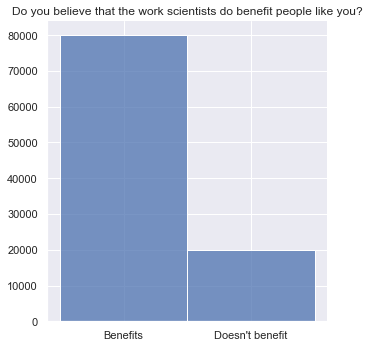

In [21]:
sns.set_theme()

ax = sns.displot(x="scientist_work", data=global_monitor)

plt.title("Do you believe that the work scientists do benefit people like you?")
plt.xlabel("")
plt.ylabel("")

plt.show()